In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
sc.settings.set_figure_params(dpi=100, 
                              dpi_save=800, 
                              format = 'png',
                              transparent = False,
                              facecolor ='white', 
                              figsize =[10,10],
                              frameon=True, 
                              fontsize =10)

In [2]:
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.8
matplotlib  3.3.4
numpy       1.20.1
pandas      1.3.4
scanpy      1.8.2
sinfo       0.3.4
-----
IPython             7.22.0
jupyter_client      6.1.12
jupyter_core        4.7.1
jupyterlab          3.0.14
notebook            6.3.0
-----
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
8 logical CPU cores, Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
-----
Session information updated at 2021-12-13 08:50


In [101]:
Toy_Dataset = pd.read_pickle(r"C:\Users\cosmic\Desktop\sc\scRaman-main\Artificial_dataset\DATA\Toy_Dataset_25_05_2021_12h.pkl")
freq = pd.DataFrame(Toy_Dataset.columns.values , columns = ['gene_ids'], index = Toy_Dataset.columns.values) # Keep columns name as 'gene_ids'
wl = freq['gene_ids'].str.replace(' cm-1','').values
wl = np.stack(wl).astype(float)

In [103]:
#color = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C',
#'#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#FFFF99','#B15928','#8DD3C7',
#'#FFFFB3','#BEBADA','#FB8072','#80B1D3','#FDB462','#B3DE69','#FCCDE5',
#'#D9D9D9','#BC80BD','#CCEBC5','#FFED6F']

Scanpy used in input anndata files

In [162]:
adata = ad.AnnData(Toy_Dataset, var=freq)
sc.pp.pca(adata, n_comps=5, svd_solver='arpack')
sc.pp.neighbors(adata,use_rep='X', n_neighbors= 15, metric ='euclidean')
sc.tl.leiden(adata, resolution = 0.5)

# Principal component analysis

Use PCA as denoising process. In this case select the 5 first PCs. 

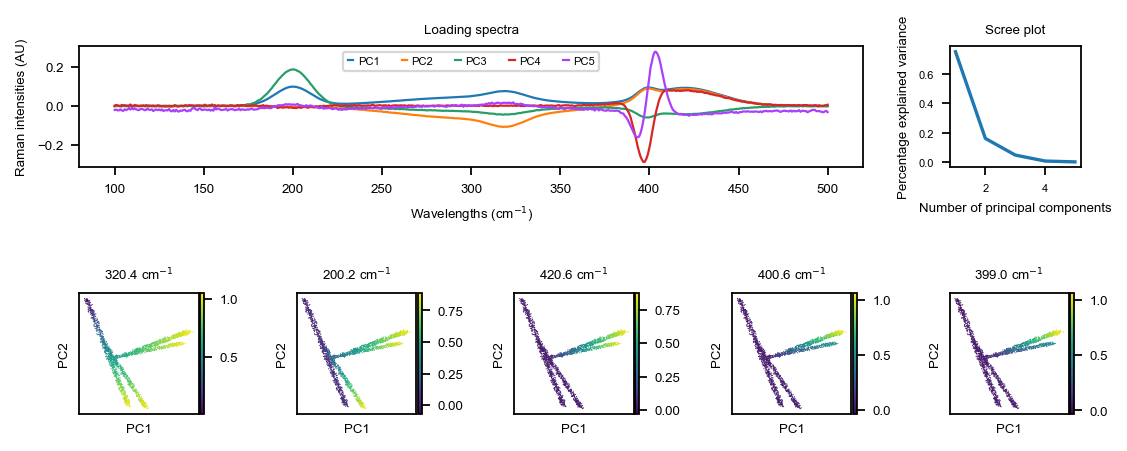

In [163]:
plt.figure(figsize=(7.25, 3))
#plt.figure(figsize=(10, 4))
fontsize = 6
rcParams['font.sans-serif'] = ['Arial']

ax1 = plt.subplot2grid((2,5),(0,0), colspan=4)
ax1.plot(wl, adata.varm['PCs'][:,0:8],linewidth = 1)
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
ax1.tick_params(labelsize=6)
ax1.legend(['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8'],
           loc='upper center', bbox_to_anchor=(0.5, 1), shadow=False, ncol=5, fontsize=5)
ax1.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax1.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax1.set_title('Loading spectra',fontsize=fontsize)

pca_range =  np.linspace(1, 5, 5,dtype=int )
ax2 = plt.subplot2grid((2,5),(0,4))
ax2.plot(pca_range,adata.uns['pca']['variance_ratio'])
ax2.xaxis.grid(False)
ax2.yaxis.grid(False)
ax2.tick_params(labelsize=5)
ax2.set_xlabel("Number of principal components",fontsize=fontsize)
ax2.set_ylabel("Percentage explained variance",fontsize=fontsize)
ax2.set_title('Scree plot',fontsize=fontsize)

ax3 = plt.subplot2grid((2,5),(1,0))
ax3 =sc.pl.pca(adata, color=['320.44 cm-1'],size = 1, show = False , ax = ax3)
ax3.set_xlabel("PC1",fontsize=fontsize)
ax3.set_ylabel("PC2",fontsize=fontsize)
ax3.set_title('320.4 cm$^{-1}$',fontsize=fontsize)
fig = plt.gcf()
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=fontsize)

ax4 = plt.subplot2grid((2,5),(1,1))
ax4 =sc.pl.pca(adata, color=['200.2 cm-1'],size = 1, show = False , ax = ax4)
ax4.set_xlabel("PC1",fontsize=fontsize)
ax4.set_ylabel("PC2",fontsize=fontsize)
ax4.set_title('200.2 cm$^{-1}$',fontsize=fontsize)
fig = plt.gcf()
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=fontsize)

ax5 = plt.subplot2grid((2,5),(1,2))
ax5 =sc.pl.pca(adata, color=['419.04 cm-1'],size = 1, show = False , ax = ax5)
ax5.set_xlabel("PC1",fontsize=fontsize)
ax5.set_ylabel("PC2",fontsize=fontsize)
ax5.set_title('420.6 cm$^{-1}$',fontsize=fontsize)
fig = plt.gcf()
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=fontsize)

ax6 = plt.subplot2grid((2,5),(1,3))
ax6 =sc.pl.pca(adata, color=['400.6 cm-1'],size = 1, show = False , ax = ax6)
ax6.set_xlabel("PC1",fontsize=fontsize)
ax6.set_ylabel("PC2",fontsize=fontsize)
ax6.set_title('400.6 cm$^{-1}$',fontsize=fontsize)
fig = plt.gcf()
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=fontsize)


ax7 = plt.subplot2grid((2,5),(1,4))
ax7 =sc.pl.pca(adata, color=['399.0 cm-1'],size = 1, show = False , ax = ax7)
ax7.set_xlabel("PC1",fontsize=fontsize)
ax7.set_ylabel("PC2",fontsize=fontsize)
ax7.set_title('399.0 cm$^{-1}$',fontsize=fontsize)
fig = plt.gcf()
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=fontsize)

plt.tight_layout()

#plt.savefig(r'C:\Users\Cosmic\Desktop\PCA_loadings.svg', dpi=600, format='svg')
#plt.savefig(r'C:\Users\Cosmic\Desktop\PCA_loadings.tiff', dpi=600, format='tiff')

# Leiden community detection 

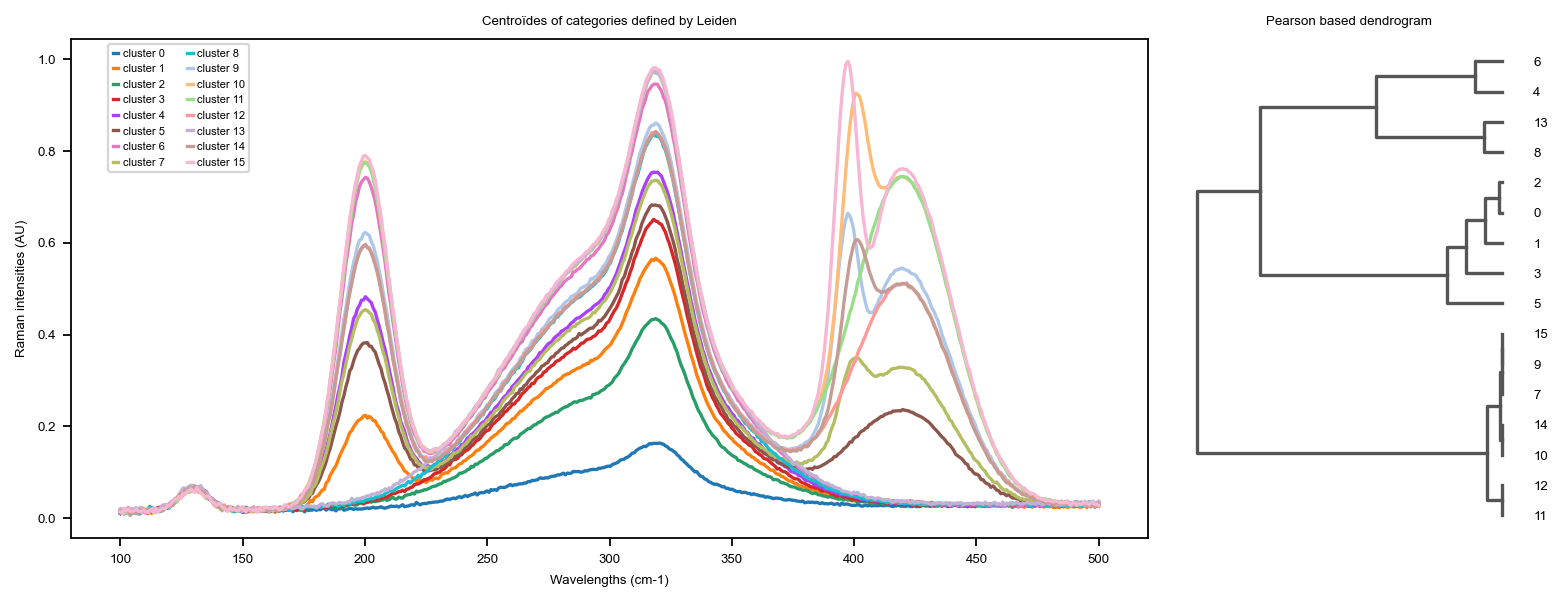

In [164]:
DATA_LEIDEN = pd.concat([adata.obs['leiden'],Toy_Dataset], axis=1)
DATA_LEIDEN = DATA_LEIDEN.groupby(['leiden']).mean()
DATA_LEIDEN= DATA_LEIDEN.set_index('cluster ' + DATA_LEIDEN.index.astype(str))
DATA_LEIDEN.columns = wl

sc.tl.rank_genes_groups(adata, 'leiden', method='t-test' )

#plt.figure(figsize=(7.25, 3))
plt.figure(figsize=(10, 4))
fontsize = 6

ax = plt.subplot2grid((1,4),(0,0), colspan=3)
ax = DATA_LEIDEN.T.plot(fontsize = fontsize ,ax=ax)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1), shadow=False, ncol=2, fontsize=5)
ax.set_xlabel('Wavelengths (cm-1)', fontsize = fontsize)
ax.set_ylabel('Raman intensities (AU)', fontsize = fontsize)
plt.title('Centroïdes of categories defined by Leiden',fontsize= fontsize)

sc.tl.dendrogram(adata, groupby = 'leiden')

ax2 = plt.subplot2grid((1,4),(0,3))
ax2 = sc.pl.dendrogram(adata, show = False, groupby = 'leiden', orientation = 'left', ax = ax2)
ax2.tick_params(labelsize=6)
ax2.set_title('Pearson based dendrogram',fontsize=fontsize)

plt.tight_layout()

# Embedding 

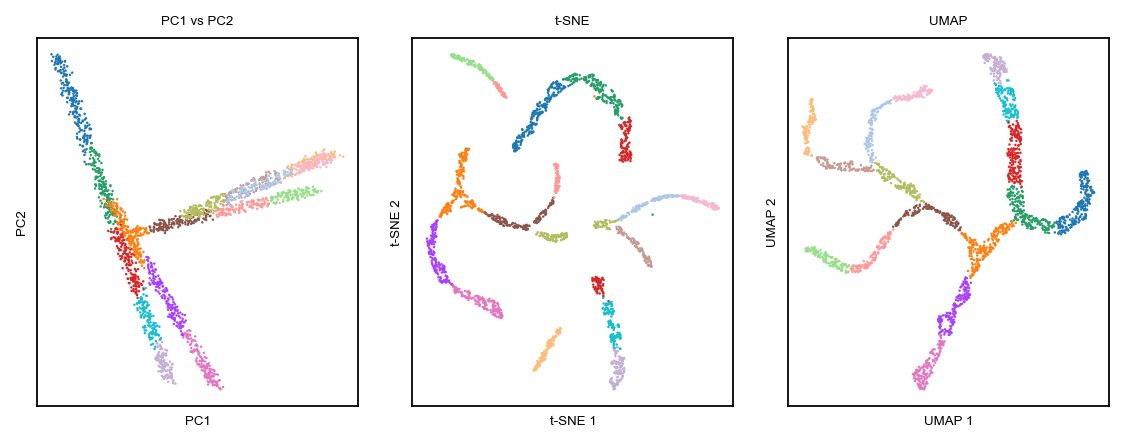

In [165]:
sc.tl.tsne(adata)
sc.tl.umap(adata)

plt.figure(figsize=(7.25, 3))
#plt.figure(figsize=(10, 4))
fontsize = 6

ax1 = plt.subplot2grid((1,3),(0,0))
ax1 = sc.pl.pca(adata, color='leiden', size = 5,show = False,  frameon = True, ax = ax1)
ax1.tick_params(labelsize=6)
ax1.set_xlabel('PC1', fontsize = fontsize)
ax1.set_ylabel('PC2', fontsize = fontsize)
ax1.set_title('PC1 vs PC2',fontsize=fontsize)
ax1.get_legend().remove()

ax2 = plt.subplot2grid((1,3),(0,1))
ax2 = sc.pl.tsne(adata, color='leiden', size = 5, show = False,  frameon = True, ax = ax2)
ax2.tick_params(labelsize=6)
ax2.set_xlabel('t-SNE 1', fontsize = fontsize)
ax2.set_ylabel('t-SNE 2', fontsize = fontsize)
ax2.set_title('t-SNE',fontsize=fontsize)
ax2.get_legend().remove()

ax3 = plt.subplot2grid((1,3),(0,2))
ax3 = sc.pl.umap(adata, color='leiden', size = 5, show = False,  frameon = True, ax = ax3)
ax3.tick_params(labelsize=6)
ax3.set_xlabel('UMAP 1', fontsize = fontsize)
ax3.set_ylabel('UMAP 2', fontsize = fontsize)
ax3.set_title('UMAP',fontsize=fontsize)
ax3.get_legend().remove()

plt.tight_layout()
#plt.savefig(r'C:\Users\Cosmic\Desktop\Figures\embeddings.svg', dpi=600, format='svg')

# PAGA

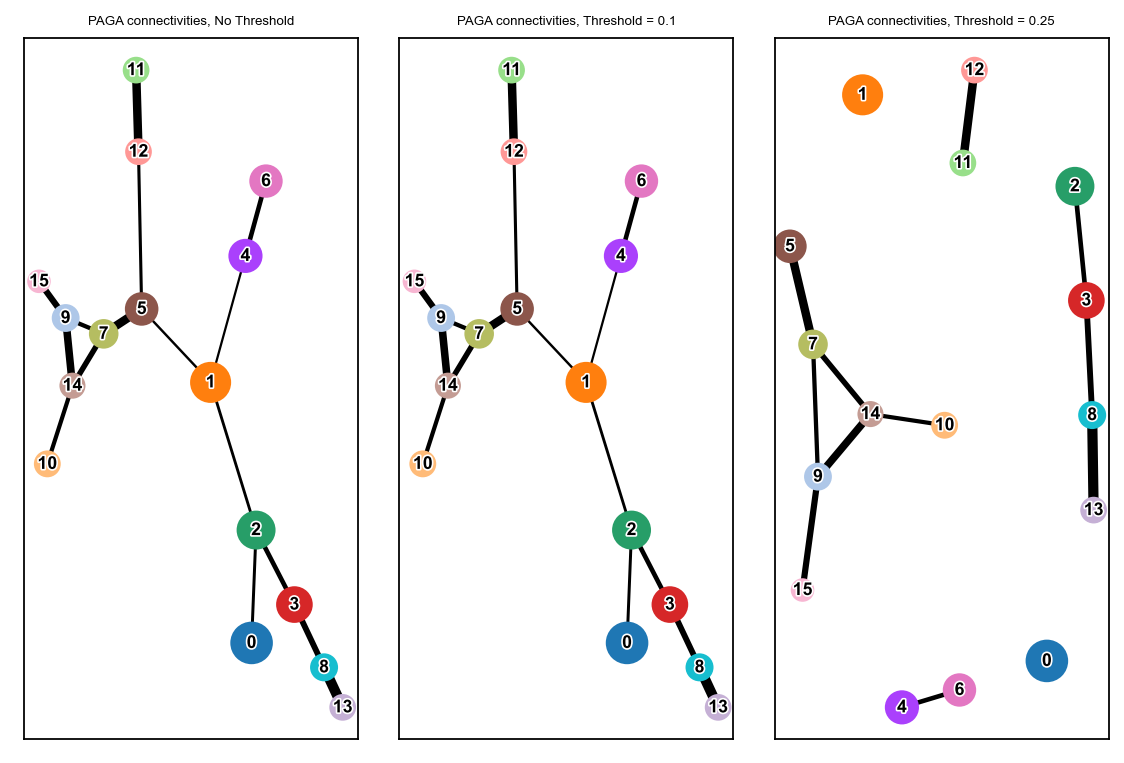

In [166]:
sc.tl.paga(adata)

fig = plt.figure()
sc.set_figure_params(figsize=(7.25,5))

fig1 = plt.subplot2grid((1,3),(0,0))
fig1 =sc.pl.paga(adata, color='leiden', show=False,fontsize = 8, fontoutline = 1.5, threshold = 0,node_size_power = 1.5,node_size_scale = 1, frameon = True ,ax = fig1)
fig1.set_title('PAGA connectivities, No Threshold',fontsize=fontsize)

fig2 = plt.subplot2grid((1,3),(0,1))
fig2 =sc.pl.paga(adata, color='leiden',show=False,fontsize = 8, fontoutline = 1.5, threshold = 0.1,node_size_power = 1.5,node_size_scale = 1, frameon = True,ax = fig2 )
fig2.set_title('PAGA connectivities, Threshold = 0.1',fontsize=fontsize)

fig3 = plt.subplot2grid((1,3),(0,2))
fig3 = sc.pl.paga(adata, color='leiden',show=False,fontsize = 8,
                 fontoutline = 1.5,threshold = 0.2, node_size_power = 1.5,
                 edge_width_scale = 1 ,node_size_scale = 1,
                 frameon = True, ax = fig3 )
fig3.set_title('PAGA connectivities, Threshold = 0.25', fontsize=fontsize)
plt.tight_layout()

#plt.savefig(r'C:\Users\Cosmic\Desktop\PAGA_cutoff.svg', dpi=600, format='svg')
#plt.savefig(r'C:\Users\Cosmic\Desktop\PAGA_cutoff.tiff', dpi=600, format='tiff')

# UMAP with PAGA initialisation 

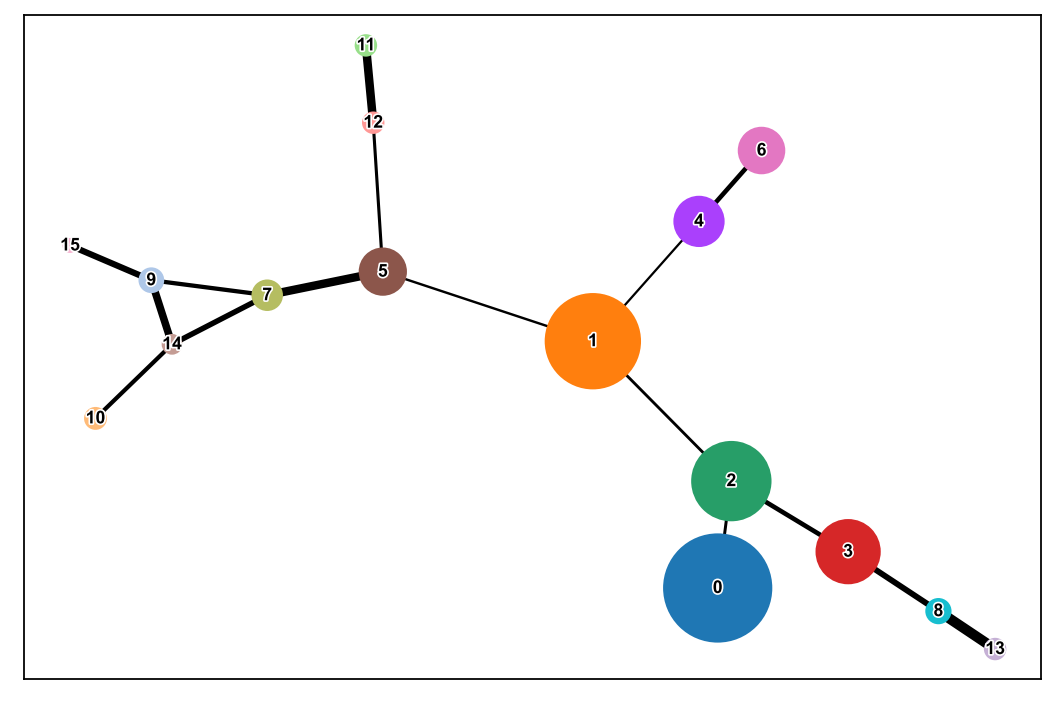

In [167]:
sc.pl.paga(adata, color='leiden', show=False,fontsize = 8,
           fontoutline = 1.5, threshold = 0,node_size_power = 5,
           node_size_scale = 1, frameon = True)

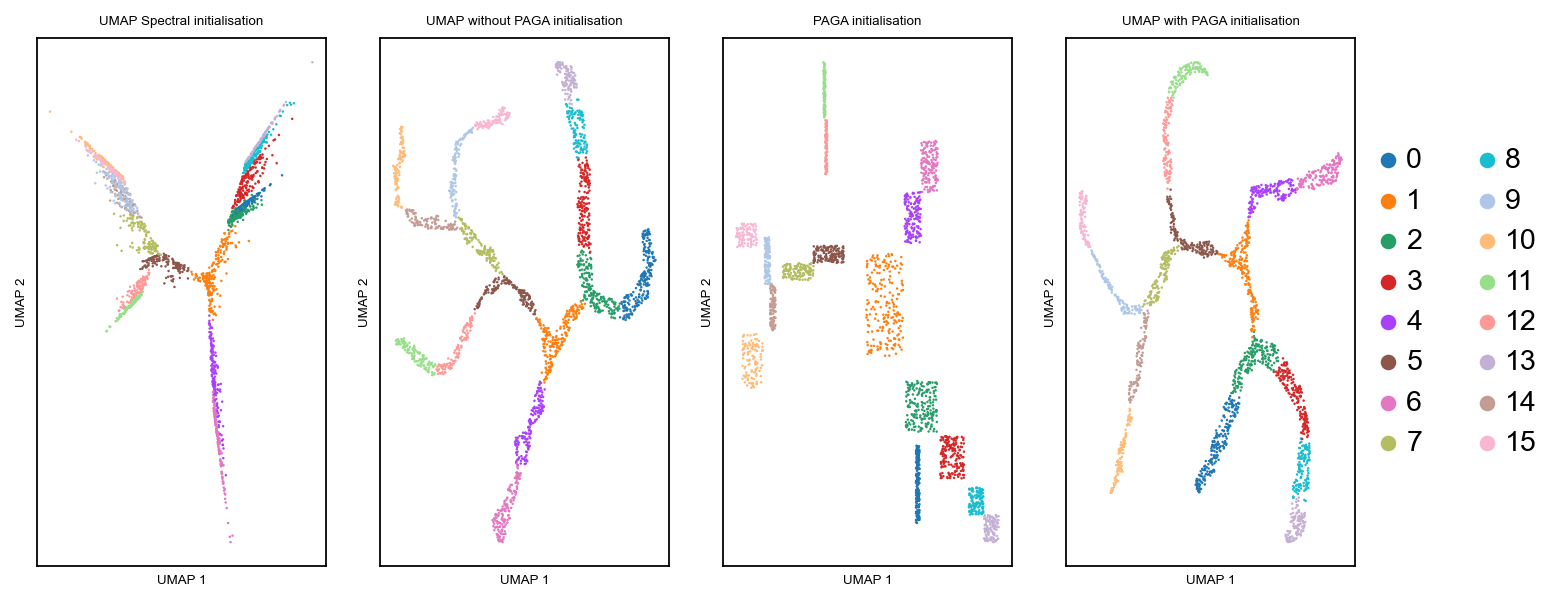

In [168]:
#plt.figure(figsize=(7.25, 3))
plt.figure(figsize=(10, 4))
fontsize = 6

sc.tl.umap(adata, maxiter = 1 )

ax1 = plt.subplot2grid((1,4),(0,0))
ax1 =sc.pl.umap(adata, color='leiden', size = 5, show = False,  frameon = True, ax = ax1)
ax1.tick_params(labelsize=6)
ax1.set_xlabel('UMAP 1', fontsize = fontsize)
ax1.set_ylabel('UMAP 2', fontsize = fontsize)
ax1.set_title('UMAP Spectral initialisation',fontsize=fontsize)
ax1.get_legend().remove()

sc.tl.umap(adata)

ax2 = plt.subplot2grid((1,4),(0,1))
ax2 = sc.pl.umap(adata, color='leiden',  size = 5, show = False,  frameon = True, ax = ax2)
ax2.tick_params(labelsize=6)
ax2.set_xlabel('UMAP 1', fontsize = fontsize)
ax2.set_ylabel('UMAP 2', fontsize = fontsize)
ax2.set_title('UMAP without PAGA initialisation',fontsize=fontsize)
ax2.get_legend().remove()

sc.tl.umap(adata, init_pos="paga" , maxiter = 1 )

ax3 = plt.subplot2grid((1,4),(0,2))
ax3 = sc.pl.umap(adata, color='leiden', size = 5, show = False,  frameon = True, ax = ax3)
ax3.tick_params(labelsize=6)
ax3.set_xlabel('UMAP 1', fontsize = fontsize)
ax3.set_ylabel('UMAP 2', fontsize = fontsize)
ax3.set_title('PAGA initialisation',fontsize=fontsize)
ax3.get_legend().remove()

sc.tl.umap(adata, init_pos="paga" )

ax4 = plt.subplot2grid((1,4),(0,3))
ax4 = sc.pl.umap(adata, color='leiden', size = 5, show = False,  frameon = True, ax = ax4)
ax4.tick_params(labelsize=6)
ax4.set_xlabel('UMAP 1', fontsize = fontsize)
ax4.set_ylabel('UMAP 2', fontsize = fontsize)
ax4.set_title('UMAP with PAGA initialisation',fontsize=fontsize)

plt.tight_layout()

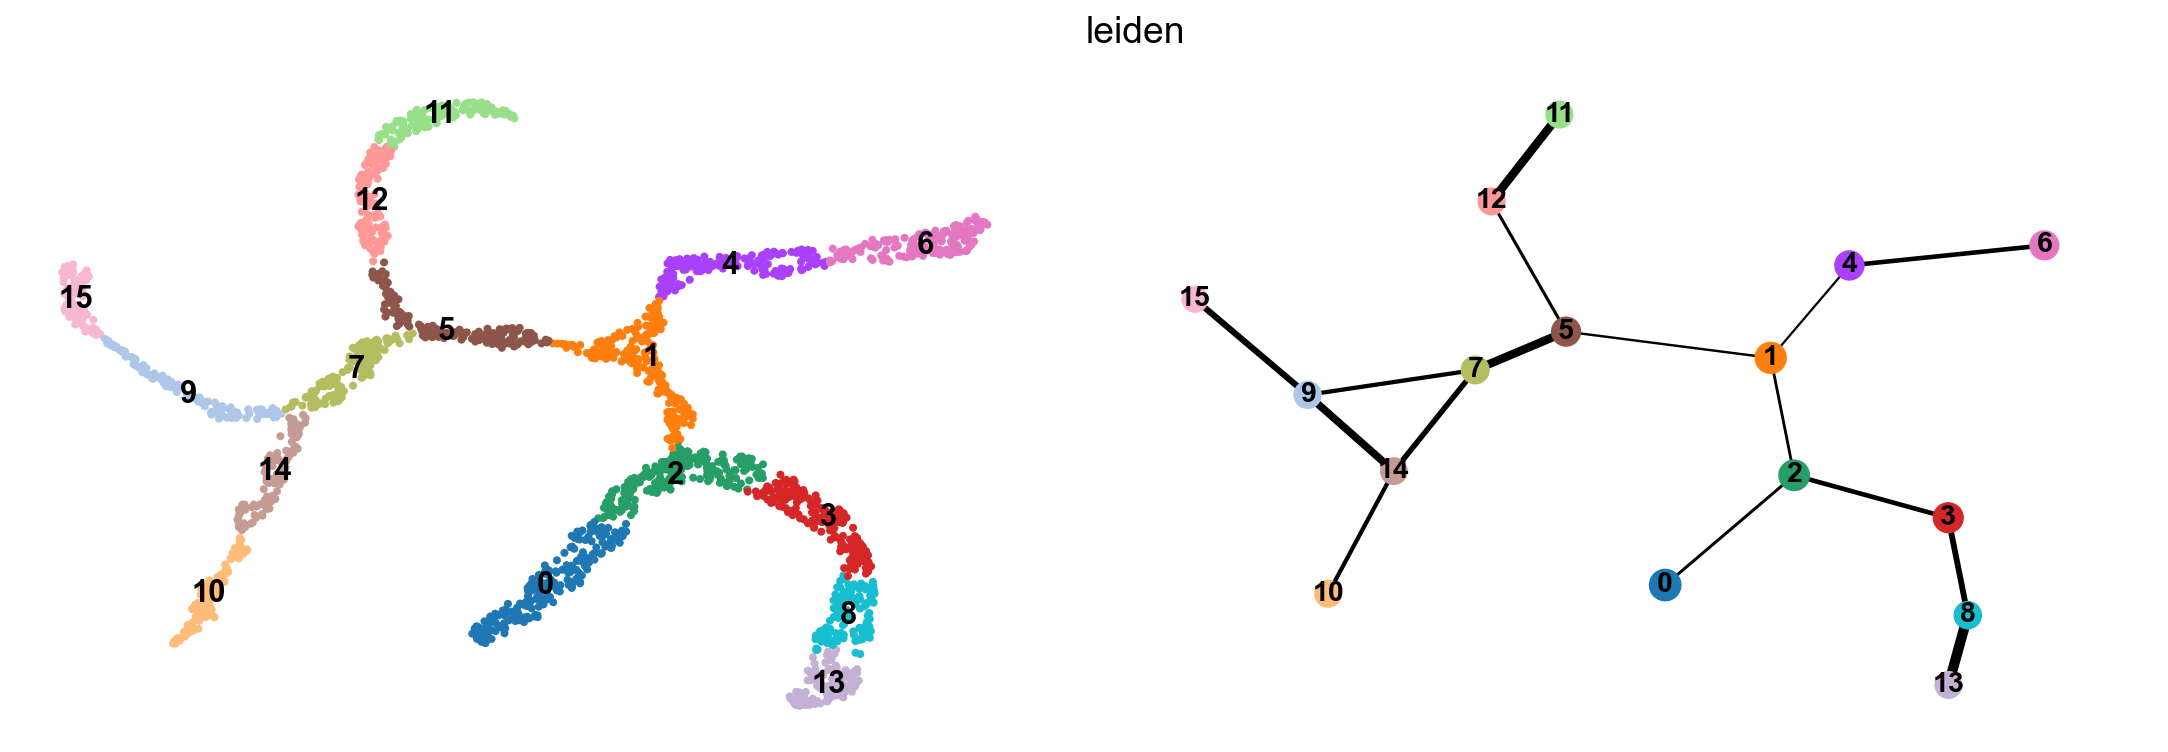

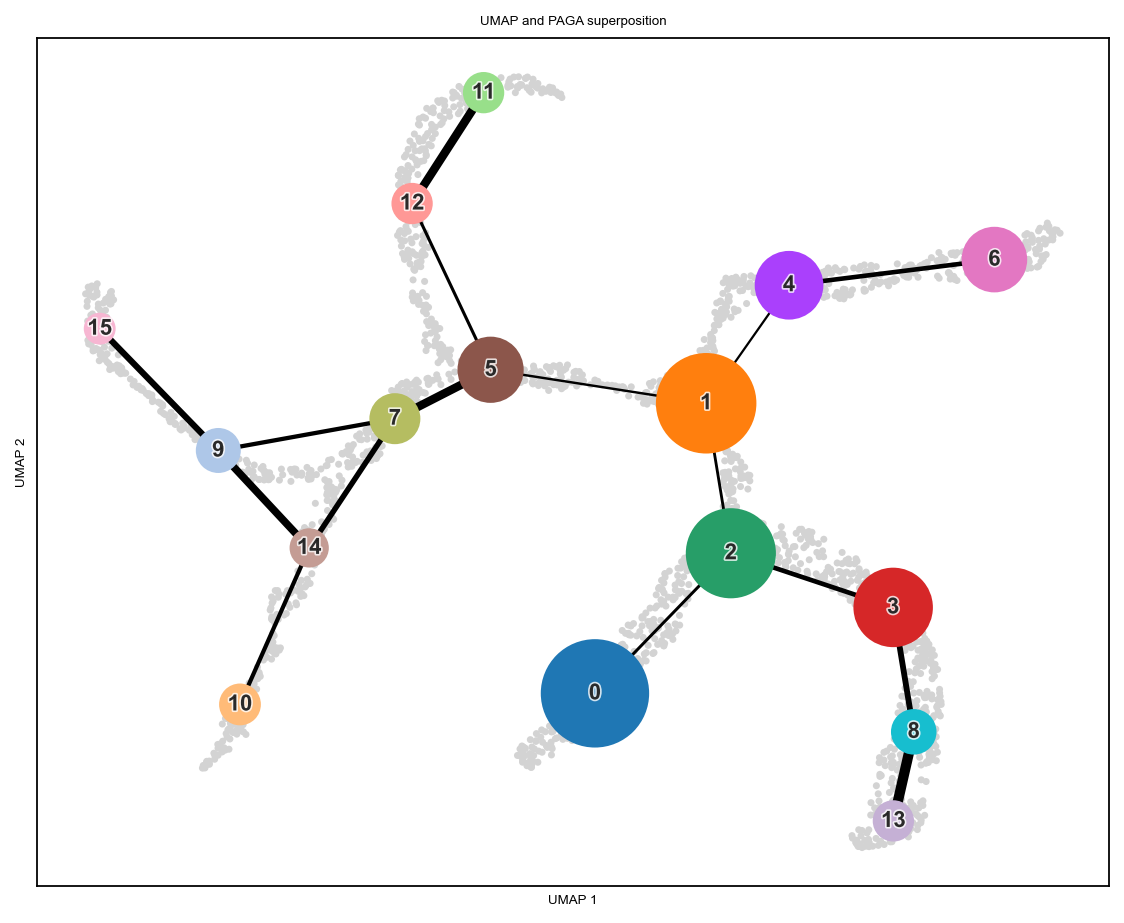

In [169]:
sc.pl.paga_compare(adata, basis='umap', show = False)

fig1, ax1 = plt.subplots(figsize=(7.25, 6))
sc.pl.umap(adata, size=40, ax=ax1, show=False)
sc.pl.paga(adata, pos=adata.uns['paga']['pos'], fontsize = 10,
                 fontoutline = 1.5, show=False, node_size_scale=3, threshold= 0, node_size_power=3, ax=ax1, text_kwds={'alpha':0.8})
#plt.savefig('./figures/umap_paga_overlay_gut.pdf', dpi=300, format='pdf')

ax1.tick_params(labelsize=6)
ax1.set_xlabel("UMAP 1",fontsize=fontsize)
ax1.set_ylabel("UMAP 2",fontsize=fontsize)
ax1.set_title('UMAP and PAGA superposition',fontsize=fontsize)
plt.tight_layout()
#plt.savefig(r'C:\Users\Cosmic\Desktop\Figures\superposition.svg', dpi=600, format='svg')

# On selectionne les clusters présents en fin de trajectoires

In [387]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden']  == '0')[0]
sc.tl.diffmap(adata)
sc.tl.dpt(adata)

In [388]:
variables = ['320.44 cm-1','200.2 cm-1','399.0 cm-1','400.6 cm-1','420.64 cm-1','129.66 cm-1']

In [400]:
paths = {'Path_1': [0,2,1,4,6],
         'Path_2': [0,2,3,8,13],
         'Path_3': [0,2,1,5,12,11],
         'Path_4': [0,2,1,5,7,14,10],
         'Path_5': [0,2,1,5,7,14,9,15]}
    

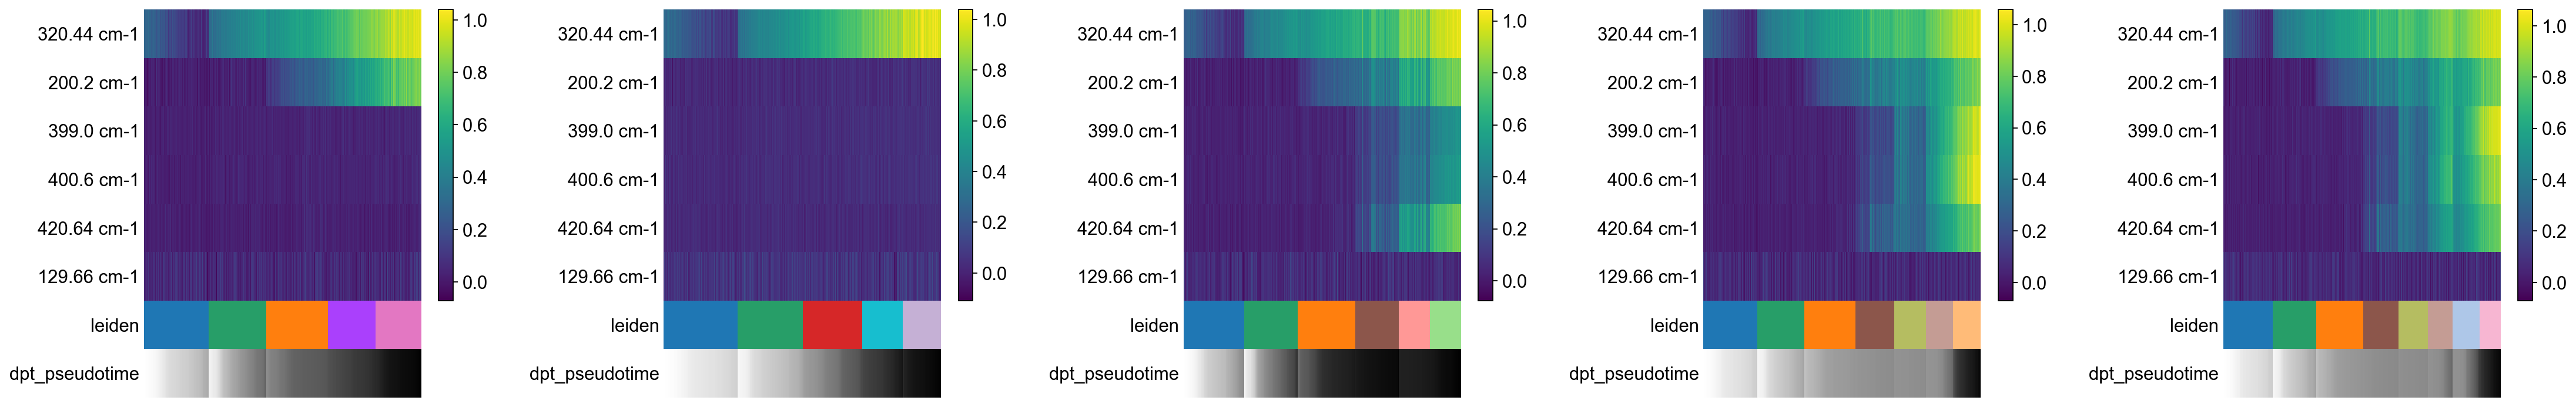

In [401]:
_, axs = pl.subplots(ncols=5, figsize=(30, 5), gridspec_kw={'wspace': 0.5, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)

for i, key in enumerate(paths):
        sc.pl.paga_path(
        adata,  nodes=paths[key][:],
        keys = variables,
        show_node_names=False,
        ax=axs[i])
pl.show()
